# 1. Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt



# data = pd.read_csv(r"C:\Users\Evg\Downloads\real_estate_data.csv", sep='\t')
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

pd.options.display.max_columns = None

In [2]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# воспользуемся методом info, посмотрим общую информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

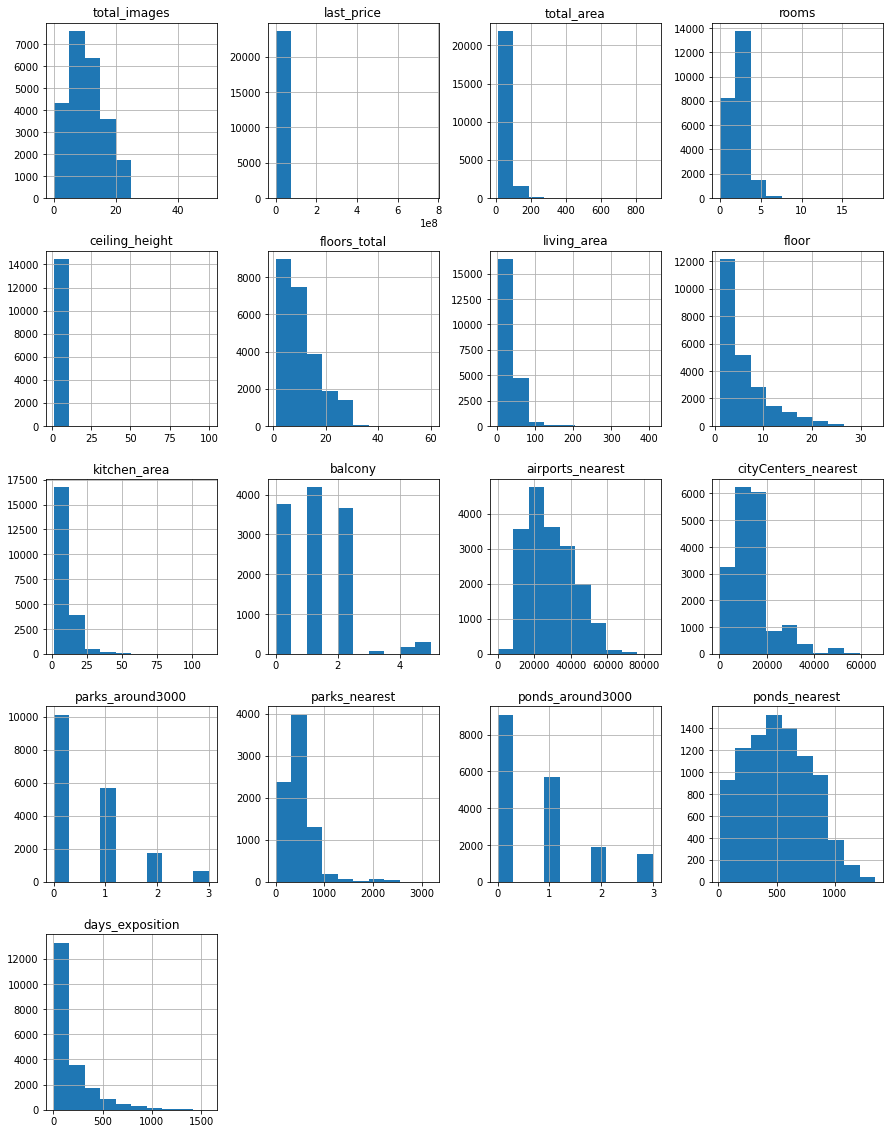

In [4]:
# построим гистрограммы для всего датасета
data.hist(figsize=(15, 20));

* Наша таблица состоит из 22 столбцов и 23699 строк
* В таблице есть четыре типа данных - целые числа, строки, вещественные числа и булевы значения
* Судя по гистрограммам, в дальнейшем стоит обратить особое внимание на столбцы last_price, total_area, rooms, ceiling_height, kitchen_area, living_area - на графиках есть "жирные" хвосты, будут какие-то аномальные значения и выбросы

In [5]:
# посмотрим, сколько пропусков в каждом столбце
data.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

* Очень много пропусков в стоблце is_apartment. Вероятно, там, где стоит пропуск, можно заменить на False, пользователь скорее всего не указал, что квартира не является апартаментами. 
* Такая же ситуация с балконами, пропуск может быть там, где не указали, что балконов нет. Попробуем заменить пропуски на 0 балконов
* В столбцах с количеством парков, прудов и аэропорта несколько вариантов - может быть, парков и прудов рядом совсем нет и их количество поэтому не указано. А может быть, значение пропущено случайно и парки и пруды на самом деле есть. Пока оставим как есть
* Пропущены значения в столбцах с площадью жилой и кухней. 
* Пропущены значения в столбце "общее количество этажей в здании". Не уверена, что тут подойдет значение медианы или среднего, поэтому пока заполним пустые значения своего рода заглушкой, чтобы были возможность работать с этим столбцом дальше, тем более пустых значений совсем мало, 86 штук

In [6]:
# посчитаем дубликаты
data.duplicated().sum() 

0

* В датасете не оказалось дублирующих строк, отлично

# 2. Предобработка данных

### 2.1 Поиск и заполнение пропущенных значений

In [8]:
# заполним пропуски в столбцах с количеством балконов, апартаментами и общим числом этажей
data['balcony'] = data['balcony'].fillna(0)

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [10]:
data['floors_total'] = data['floors_total'].fillna(55555)

In [11]:
# попробуем заполнить пропуски в жилой и кухонной площадях с помощью коэффициента, показывающего, 
# какова в общем доля той или иной площади от общей 
# беру медиану, так как думаю, что она более точно отразит значение для всех площадей, чем среднее
k = data['living_area'].median() / data['total_area'].median()
k

0.5769230769230769

In [12]:
# коэффициент для площади кухни
f = data['kitchen_area'].median() / data['total_area'].median()
f

0.175

In [13]:
data.loc[data['living_area'].isna(), 'living_area'] = data.loc[data['living_area'].isna(), 'total_area'] * k

In [14]:
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data.loc[data['kitchen_area'].isna(), 'total_area'] * f

In [15]:
# заполним пропуски и в столбце потолки, чтобы было удобнее работать, воспользуемся заглушкой
data['ceiling_height'] = data['ceiling_height'].fillna(55555)

In [16]:
data.isna().sum().sort_values()

total_images                0
balcony                     0
kitchen_area                0
open_plan                   0
is_apartment                0
floor                       0
living_area                 0
studio                      0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
floors_total                0
locality_name              49
days_exposition          3181
parks_around3000         5518
ponds_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ponds_nearest           14589
parks_nearest           15620
dtype: int64

### 2.2 Изменение типа данных

In [17]:
# поменяем тип данных в столбцах с балконами, все-таки количество должно быть целым числом
data['balcony'] = data['balcony'].astype('int')

In [18]:
# заменим тип даты выставления объявления на datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [19]:
# поменяем тип данных в числе этажей
data['floors_total'] = data['floors_total'].astype('int')

In [20]:
# проверим, как поменялись типы данных в столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

* Менять тип данных необходимо, чтобы потом можно было корректно работать с данными. Если например оставить дату строками, потом не получится вытащить оттуда необходимые значения (день, месяц, год и т.д.)

### 2.3 Обработка дубликатов и артефактов

In [22]:
# выведем количество уникальных значений в столбце населенных пунктов
data['locality_name'].nunique()

364

In [23]:
# выведем список уникальных значений в столбце населенных пунктов
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

* Получилось 364 уникальных имени населенных пунктов. Как мы видим, дублируются названия с буквой "ё" и "е". Попробуем избавиться от таких неявных дубликатов


In [24]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

* Также очень много неявных дубликатов типа "поселок при железнодорожной станции Вещево" и "Вещево". Судя по всему, нас.пункты одинаковые, но учитываются они как разные

In [25]:
# функция для удаления типов населенных пунктов (поселок городского типа, ж/д станция и т.д.)
# оставим только имена собственные, начинающиеся с заглавной буквы (Санкт-Петербург, Пушкин, Парголово и т.д.)
def uniq_loc_name(row):
    for i in row.split():
        if not i.istitle():
            row = row.replace(i, '')  
    return row.strip()

In [27]:
# применим функцию и сразу заменим здесь пропуски на неизвестное значение, так как не вижу 
# другого способа заменить насел.пункты
data['locality_name'] = data['locality_name'].fillna('Неизвестно').apply(uniq_loc_name)

In [28]:
data['locality_name'].nunique()

306

* Отлично, уникальных населенных пунктов стало меньше. Теперь подробнее рассмотрим значения высоты потолков

<AxesSubplot:>

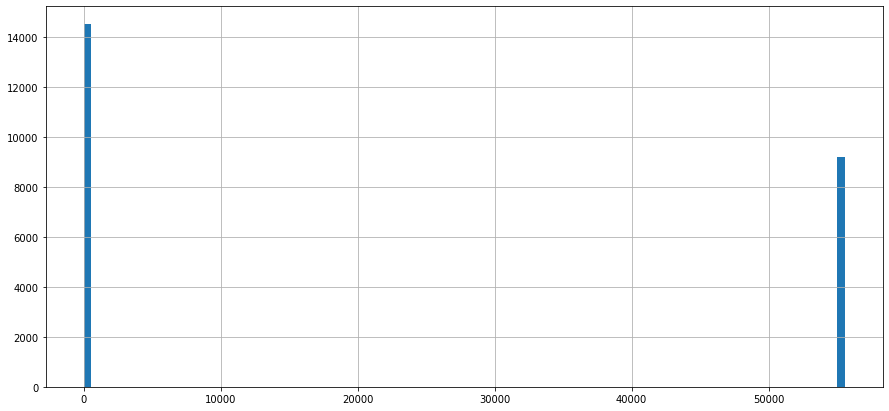

In [29]:
data['ceiling_height'].hist(bins=100, figsize=(15,7))

* У нас есть странные значения высоты - 20, 30 и даже 100 метров. Выглядит очень неправдоподобно. Но значения 25, 26...30, 40 вероятно говорят о том, что при заполнении ошиблись и просто не там стоит запятая. ТАкже есть очень маленькие значения меньше 2 метров, вряд ли бывают такие низкие квартиры. Примем, что возмодно могут быть шикарные апартаменты с высотой потолков до 4 м, но не более

<AxesSubplot:>

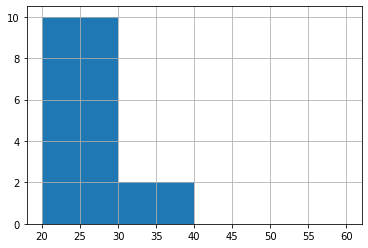

In [30]:
data.query('ceiling_height > 25')['ceiling_height'].hist(bins=4, range=(20,60))

In [31]:
# функция для замены странных значений высоты на правильные (25 на 2.5 например)
def ceiling(row):
    if 20 < row < 45:
            row = row /10
    return row

In [33]:
data['ceiling_height'] = data['ceiling_height'].apply(ceiling)

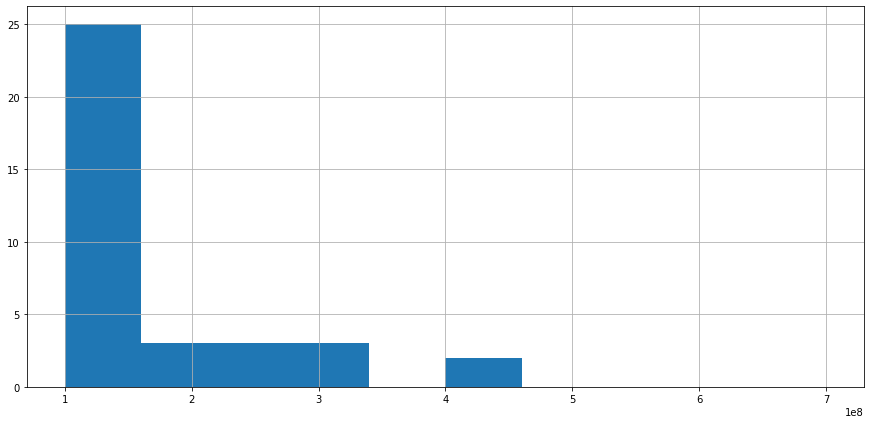

In [34]:
# в столбце с ценой есть очень большие значения от 100 до 700 млн
data['last_price'].hist(range=(100000000, 700000000),figsize=(15,7));

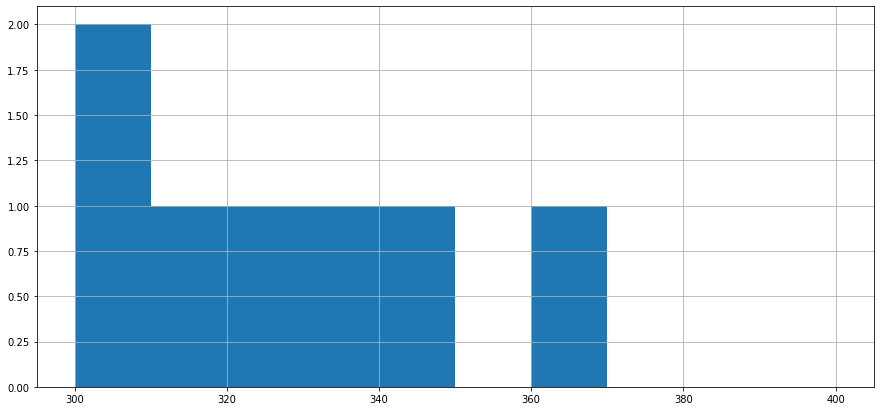

In [35]:
data['living_area'].hist(range=(300, 400),figsize=(15,7));

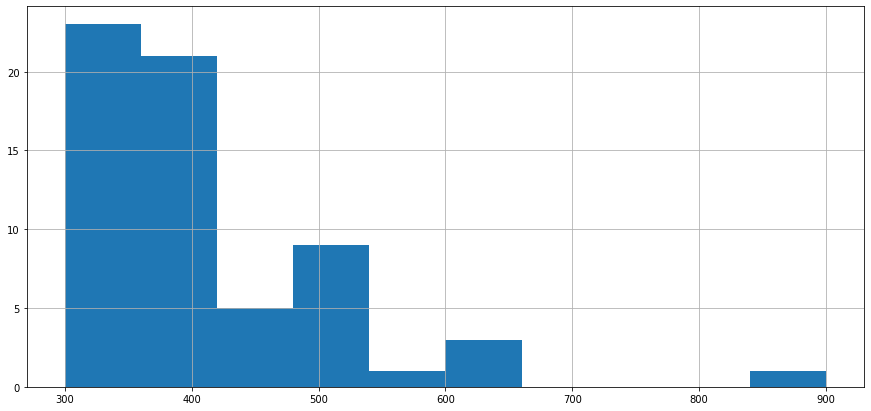

In [36]:
data['total_area'].hist(range=(300, 900),figsize=(15,7));

* Во всех этих столбцах есть очень большие значения, но они вполне реальны. Их можно либо удалить совсем, либо проанализировать выбросы с помощью графика boxplot и уже отсечь в анализе.

### 2.4 Добавление новых столбцов

* добавление столбца **цена одного квадратного метра**

In [37]:
data['price_per_square'] = data['last_price'] / data['total_area']

* добавление столбца **день недели публикации объявления**

In [38]:
data['weekday'] = data['first_day_exposition'].dt.weekday

* добавление столбца **месяц публикации объявления**

In [39]:
data['month'] = data['first_day_exposition'].dt.month

* добавление столбца **год публикации объявления**

In [40]:
data['year'] = data['first_day_exposition'].dt.year

* добавление столбца **тип этажа квартиры**

In [41]:
# функция для распределения этажей по типам; если есть заглушка 55555, то оставим 'неизвестно'
def type_of_floor(row):
    floor = row['floor']
    total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == total:
        return 'последний'
    elif total == 55555:
        return 'неизвестно'
    else:
        return 'другой'

In [42]:
data['type_of_floor'] = data.apply(type_of_floor, axis=1)

 * добавление столбца **расстояние до центра города в километрах**

In [43]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

**Вывод**
* Добавили в наш датасет несколько новых столбцов, чтобы анализ был более полным

# 3. Исследовательский анализ данных

## 3.1 Изучение параметров объектов

### 3.1.1 общая площадь

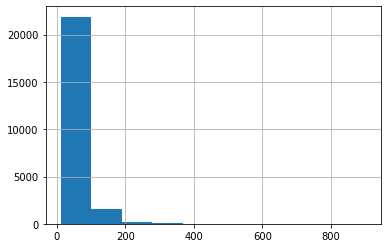

In [44]:
# построим гистограмму по столбцу с общей площадью
data['total_area'].hist();

* Видим жирный хвост справа, похоже на выброс или какое-то аномальное значение. Попробуем посмотреть через процентиль

In [45]:
print(data['total_area'].quantile(0.99))
print(data['total_area'].quantile(0.01))

197.21400000000028
25.199


* Как мы видим, 99% наших квартир имеют площадь меньше 197 кв.метров и всего 1% меньше 25 кв.метров. Перестроим нашу гистрограмму, отбросив эти площади

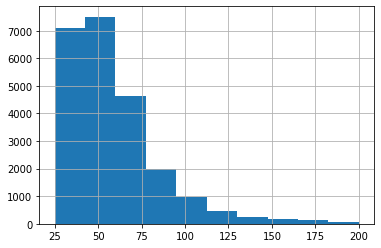

In [46]:
data['total_area'].hist(range=(25,200));

In [47]:
total_area_fm = data.query('total_area < 200')['total_area'].median()
total_area_m = data['total_area'].median()
total_area_fme = data.query('total_area < 200')['total_area'].mean()
total_area_me = data['total_area'].mean()
print(f'Медиана и среднее по 99% данных:')
print(f'медиана общей площади {total_area_fm} и среднее общей площади {total_area_m}')
print(f'Медиана и среднее по всем данным:')
print(f'медиана общей площади {total_area_fme} и среднее общей площади {total_area_me}')

Медиана и среднее по 99% данных:
медиана общей площади 51.9 и среднее общей площади 52.0
Медиана и среднее по всем данным:
медиана общей площади 58.15562851542526 и среднее общей площади 60.34865099793241


* После подсчета медианы и среднего видно, что медиана менее чуствительна к выбросам, в отличие от среднего - 52 кв.метра против 60 кв.метров по всем данным вместе с выбросами. Если отбросить больгие площади, то медиана 51.6, а среднее 52, почти совпадает

### 3.1.2 жилая площадь

* Сразу ранжируем гистрограмму через процентили

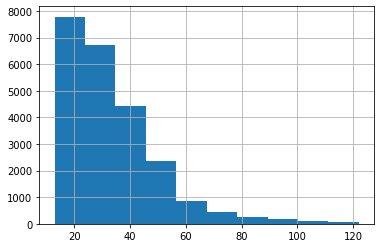

In [48]:
data['living_area'].hist(range=(data['living_area'].quantile(0.01),data['living_area'].quantile(0.99)));

In [49]:
r = data['living_area'].quantile(0.99)
living_area_fm = data.query('living_area < @r')['living_area'].median()
living_area_m = data['living_area'].median()
living_area_fme = data.query('living_area < @r')['living_area'].mean()
living_area_me = data['living_area'].mean()
print(f'Медиана и среднее по 99% данных:')
print(f'медиана жилой площади {living_area_fm} и среднее жилой площади {living_area_m}')
print(f'Медиана и среднее по всем данным:')
print(f'медиана жилой площади {living_area_fme} и среднее жилой площади {living_area_me}')

Медиана и среднее по 99% данных:
медиана жилой площади 30.0 и среднее жилой площади 30.0
Медиана и среднее по всем данным:
медиана жилой площади 33.23302005179136 и среднее жилой площади 34.624295555008814


* Средная жилая площадь равна 30 кв.метрам. Есть также очень большие значения, но они тоже судя по всему относятся к элитной недвижимости. 99% квартир имеют жилую площадь меньше 120 кв.метров.

### 3.1.3 площадь кухни

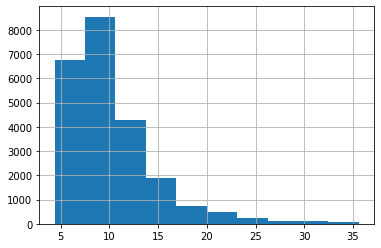

In [50]:
data['kitchen_area'].hist(range=(data['kitchen_area'].quantile(0.01),data['kitchen_area'].quantile(0.99)));

In [51]:
r = data['kitchen_area'].quantile(0.99)
kitchen_area_fm = data.query('kitchen_area < @r')['kitchen_area'].median()
kitchen_area_m = data['kitchen_area'].median()
kitchen_area_fme = data.query('kitchen_area < @r')['kitchen_area'].mean()
kitchen_area_me = data['kitchen_area'].mean()
print(f'Медиана и среднее по 99% данных:')
print(f'медиана площади кухни {kitchen_area_fm} и среднее площади кухни {kitchen_area_m}')
print(f'Медиана и среднее по всем данным:')
print(f'медиана площади кухни {kitchen_area_fme} и среднее площади кухни {kitchen_area_me}')

Медиана и среднее по 99% данных:
медиана площади кухни 9.0 и среднее площади кухни 9.0
Медиана и среднее по всем данным:
медиана площади кухни 10.12885271929077 и среднее площади кухни 10.505495379551881


* Площадь кухни находится в диапазоне от 5 до 35 квадратов. Большая часть сосредоточена в значениях от 5 до 15. Среднее и медиана равны 9 квадратам.

### 3.1.4 цена объекта

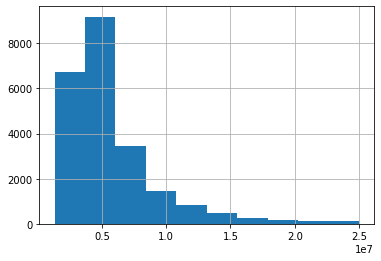

In [52]:
data['last_price'].hist(range=(data['last_price'].quantile(0.02),data['last_price'].quantile(0.98)));

In [53]:
r = data['last_price'].quantile(0.98)
last_price_fm = data.query('last_price < @r')['last_price'].median()
last_price_m = data['last_price'].median()
last_price_fme = data.query('last_price < @r')['last_price'].mean()
last_price_me = data['last_price'].mean()
print(f'98% квартир стоят меньше {r} рублей \n')

print(f'Медиана и среднее по 98% данных:')
print(f'медиана стоимости {last_price_fm} и среднее стоимости {last_price_m}')
print(f'Медиана и среднее по всем данным:')
print(f'медиана стоимости {last_price_fme} и среднее стоимости {last_price_me}')

98% квартир стоят меньше 25000000.0 рублей 

Медиана и среднее по 98% данных:
медиана стоимости 4600000.0 и среднее стоимости 4650000.0
Медиана и среднее по всем данным:
медиана стоимости 5579942.527148152 и среднее стоимости 6541548.771551542


* 98% квартир стоят меньше 25000000 рублей. Медиана и среднее равны 4600000 и 4650000 рублей соответственно. ТАкже есть очень выбросы, опять же либо это коммерция либо элитное жилье. 

### 3.1.5 количество комнат

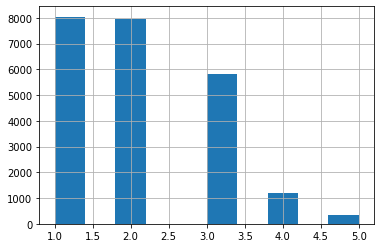

In [54]:
data['rooms'].hist(range=(data['rooms'].quantile(0.01),data['rooms'].quantile(0.99)));

In [55]:
r = data['rooms'].quantile(0.99)
fmean = data.query('rooms < @r')['rooms'].median()
fmed = data.query('rooms < @r')['rooms'].mean()

print(f'Медиана и среднее по 99% данных:')
print(f'медиана количества комнат {fmean} и среднее количества комнат {fmed}')


Медиана и среднее по 99% данных:
медиана количества комнат 2.0 и среднее количества комнат 1.9884804556044524


* Количество комнат в основном от одной до пяти. Большая часть квартир с 1 и 2 комнатами, примерно по 8000 объявлений. Среднее и медиана примерно равны двум комнатам

### 3.1.6 высота потолков

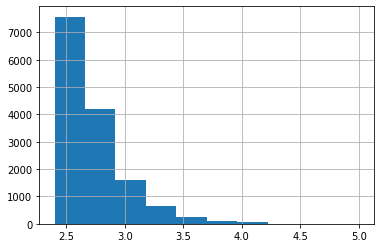

In [56]:
data['ceiling_height'].hist(bins=10, range=(2.4,5));

In [57]:
r = data['ceiling_height'].quantile(0.99)
fmean = data.query('ceiling_height < @r')['ceiling_height'].median()
fmed = data.query('ceiling_height < @r')['ceiling_height'].mean()

print(f'Медиана и среднее по 99% данных:')
print(f'медиана {fmean} и среднее {fmed}')

Медиана и среднее по 99% данных:
медиана 2.65 и среднее 2.7370539161610585


* Высота потолков колеблется от 2 до 4.5 метров. В этом столбце были пропуски и странные значения (либо очень маленькие либо наоборот слишком большие). Но в целом видим, что потолки в квартирах бывают обычно от 2.5 до 3.2 метров. Медиана и среднее равны 2.65 и 2.74 м соответственно

### 3.1.7 этаж квартиры

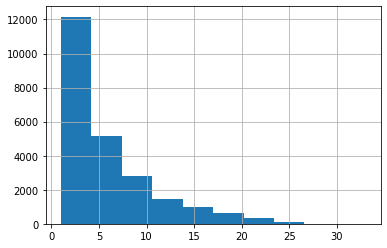

In [58]:
data['floor'].hist();

In [59]:
r = data['floor'].quantile(0.99)
fmean = data.query('floor < @r')['floor'].median()
fmed = data.query('floor < @r')['floor'].mean()

print(f'Медиана и среднее по 99% данных:')
print(f'медиана {fmean} и среднее {fmed}')

Медиана и среднее по 99% данных:
медиана 4.0 и среднее 5.697398720682303


* Больше всего продается квартир с 1 по 7 этажи. Аномалий по столбцу не наблюдалось. Есть и квартиры в высотках 25, 30 этажей. Средний этаж - 5, а медианный - 4.

### 3.1.8 тип этажа квартиры

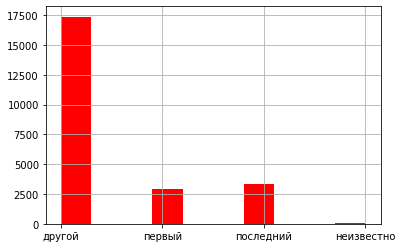

In [60]:
data['type_of_floor'].hist(color='r');

* На первом и последнем этажах квартир меньше, чем на любом другом.

### 3.1.9 общее количество этажей в доме

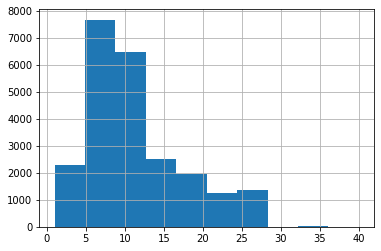

In [61]:
data['floors_total'].hist(range=(1,40));

In [62]:
r = data['floors_total'].quantile(0.99)
fmean = data.query('floors_total < @r')['floors_total'].median()
fmed = data.query('floors_total < @r')['floors_total'].mean()

print(f'Медиана и среднее по 99% данных:')
print(f'медиана {fmean} и среднее {fmed}')

Медиана и среднее по 99% данных:
медиана 9.0 и среднее 10.507886300491558


* Количество этажей в доме находится между 1 и 30 этажами. Есть значение в 35 этажей, но полагаю, такой дом вполне может существовать. Основная масса квартир сосредоточена между 5-ти и 10-ти этажными домами. Это подтверждает и среднее - примерно 10 этажей.

### 3.1.10 расстояние до центра города в метрах

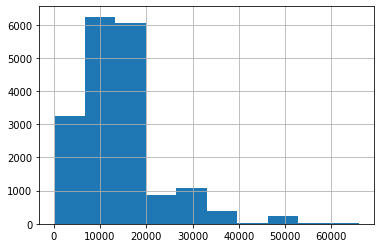

In [63]:
data['cityCenters_nearest'].hist();

In [64]:
r = data['cityCenters_nearest'].quantile(0.99)
fmean = data.query('cityCenters_nearest < @r')['cityCenters_nearest'].median()
fmed = data.query('cityCenters_nearest < @r')['cityCenters_nearest'].mean()

print(f'Медиана и среднее по 99% данных:')
print(f'медиана {fmean} и среднее {fmed}')

Медиана и среднее по 99% данных:
медиана 13046.0 и среднее 13805.10823424825


* Среднее расстояние до центра города - 13.8 км. Есть аномальные значения в 60 и более км, но тут неясно, может это отдаленный пригород Санкт-Петербурга и центром города считается центр Петербурга.

### 3.1.11 расстояние до ближайшего аэропорта

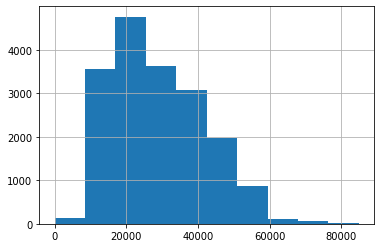

In [65]:
data['airports_nearest'].hist();

In [66]:
r = data['airports_nearest'].quantile(0.99)
fmean = data.query('airports_nearest < @r')['airports_nearest'].median()
fmed = data.query('airports_nearest < @r')['airports_nearest'].mean()

print(f'Медиана и среднее по 99% данных:')
print(f'медиана {fmean} и среднее {fmed}')

Медиана и среднее по 99% данных:
медиана 26508.0 и среднее 28409.844228094575


* До аэропорта расстояние в основном от 10 до 40 км. Среднее значение - 28.4 км.

### 3.1.12 расстояние до ближайшего парка

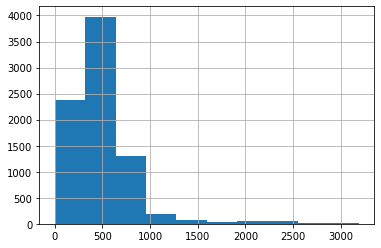

In [67]:
data['parks_nearest'].hist();

In [68]:
r = data['parks_nearest'].quantile(0.99)
fmean = data.query('parks_nearest < @r')['parks_nearest'].median()
fmed = data.query('parks_nearest < @r')['parks_nearest'].mean()

print(f'Медиана и среднее по 99% данных:')
print(f'медиана {fmean} и среднее {fmed}')

Медиана и среднее по 99% данных:
медиана 448.0 и среднее 465.709661229611


* Среднее расстояние до парка - 465 метров. Много квартир находятся на расстоянии всего до 1 км от парка. Есть совсем немного объявлений, где парк расположен в 3 км. 

### 3.1.13 день и месяц публикации объявления

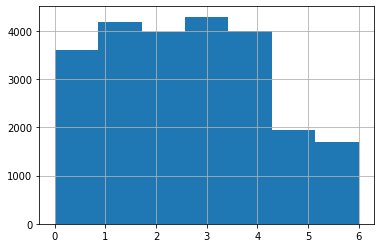

In [69]:
data['weekday'].hist(bins=7);

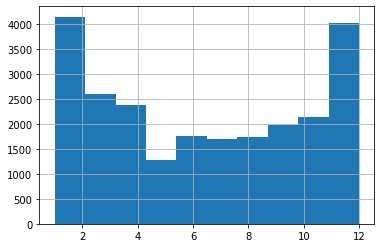

In [70]:
data['month'].hist();

* Больше всего публикаций делают во вторник и четверг и в целом по будням выкладывают объявления активнее, чем в выходные. Самые активные месяцы - январь и декабрь. А вот в мае наборот меньше всего объявлений (хорошо отдыхают люди на майские)).

* **Общий вывод**

Средняя квартира,выставляемая в объявлении: площадью 52 кв.м., с жилой площадью 30 квадратов и площадью кухни 9 квадратов, стоимостью 4.65 млн руб, двухкомнатная, с высотой потолков 2.7 метра на 5 этаже в 10-этажном доме, расстояние до центра города 13.8 км, а до аэропорта 28 км. Также вероятнее всего будет рядом парк в 0.5 км. И также весьма вероятно, что объявление выставлено в будний день в декабре-январе


## 3.2 Длительность продажи квартир

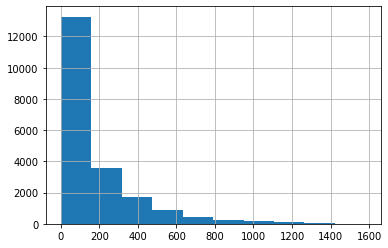

In [71]:
data['days_exposition'].hist();

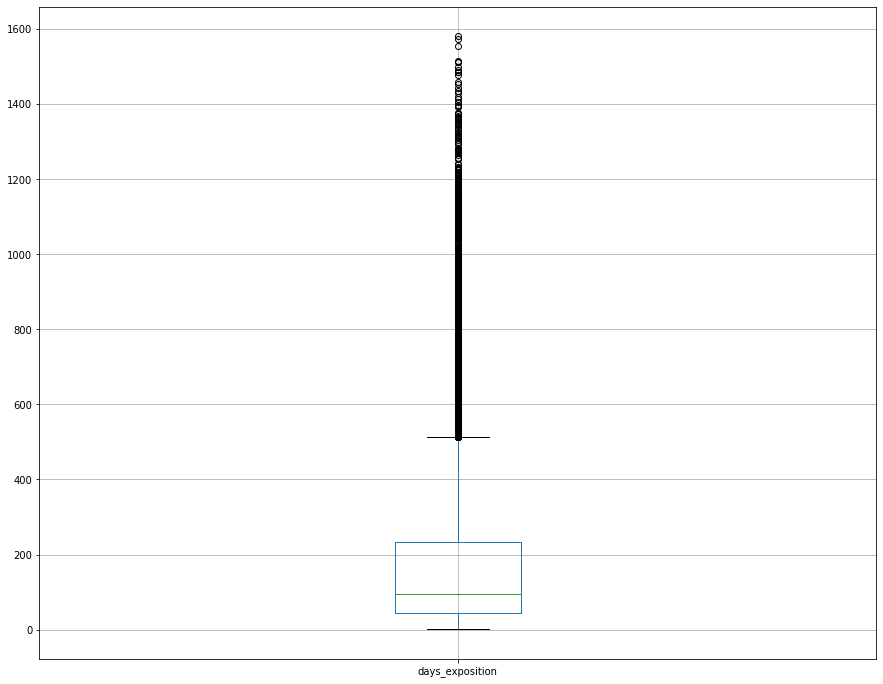

In [72]:
data.boxplot(column='days_exposition', figsize=(15,12));

In [73]:
# межквартильный размах
q = (data['days_exposition'].quantile(0.75)-data['days_exposition'].quantile(0.25))* 1.5

# правая граница усов, за ней уже выбросы
r = q + data['days_exposition'].quantile(0.75)


days_mean = data['days_exposition'].mean()
days_med = data['days_exposition'].median()
days_meanf = data.query('days_exposition < @r')['days_exposition'].mean()
days_medf = data.query('days_exposition < @r')['days_exposition'].median()
print(f'Длительность более {r} дней считается выбросом \n')

print(f'Медиана и среднее без выбросов:')
print(f'медиана {days_medf} и среднее {days_meanf}')
print(f'Медиана и среднее по всем данным:')
print(f'медиана {days_med} и среднее {days_mean}')

Длительность более 512.5 дней считается выбросом 

Медиана и среднее без выбросов:
медиана 85.0 и среднее 128.75388614780624
Медиана и среднее по всем данным:
медиана 95.0 и среднее 180.88863436982163


In [74]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

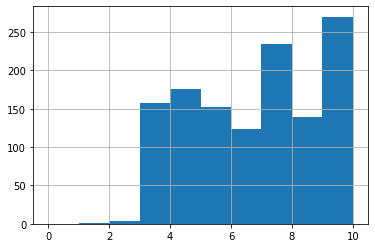

In [75]:
data['days_exposition'].hist(range=(0,10));

* **Вывод:**

По графику ящика видно, что значения больше 512 дней считаются выбросами. Если выбросы убрать, то в среднем квартиру продают за 128 дней, а медиана равна 85. По всем данным среднее и медиана равны 180 и 95 дней соответственно. Вообще значения больше 1000 дней можно считать очень долгими, это больше трех лет. Также судя по гистограмме есть время продажи менее 10 дней. Вряд ли можно успеть продать квартиру быстрее 10-14 дней, учитывая необходимость подготовки и проверки документов. С другой стороны, таких объявлений достаточно много, десятидневных продаж больше 250. ВОзможно в данные могли закрасться ошибки

## 3.3 Влияние разных параметров на цену квартиры

### 3.3.1 Влияние общей площади на цену

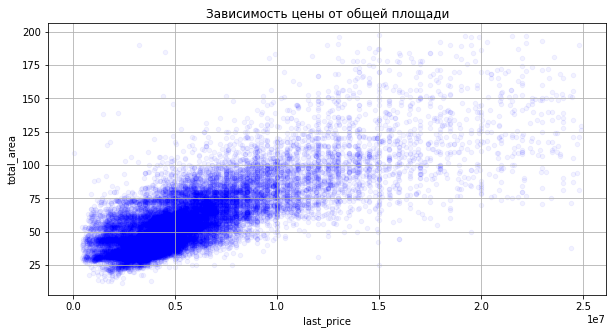

In [76]:
# сразу посчитаем процентили, чтобы по ним отсечь лишнее, и построим диаграмму рассеяния, 
# чтобы увидеть связь между двумя показателями
r = data['total_area'].quantile(0.99)
p = data['last_price'].quantile(0.98)
data.query('(last_price < @p) & (total_area < @r)'). \
plot(
    x='last_price', 
    y='total_area', 
    kind='scatter', 
    figsize=(10, 5), 
    grid=True, 
    alpha=0.05,
    c='b',
    title='Зависимость цены от общей площади'
);

In [77]:
data['last_price'].corr(data['total_area'])

0.6536750579657242

* На графике мы видим, что связь между ценой и площадью определенно есть. КОэффициент корреляции равен 0,65, что также показывает достаточно сильную прямую зависимость.

### 3.3.2 Влияние  жилой площади на цену

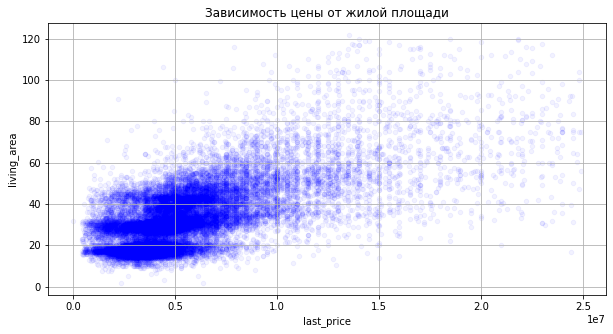

In [78]:
r = data['living_area'].quantile(0.99)
p = data['last_price'].quantile(0.98)
data.query('(last_price < @p) & (living_area < @r)'). \
plot(
    x='last_price', 
    y='living_area', 
    kind='scatter', 
    figsize=(10, 5), 
    grid=True, 
    alpha=0.05,
    c='b',
    title='Зависимость цены от жилой площади'
);

In [79]:
data['last_price'].corr(data['living_area'])

0.5858907700395659

* Здесь зависимость уже слабее, это видно и на графике и по коэффициенту корреляции.

### 3.3.3 Влияние площади кухни на цену

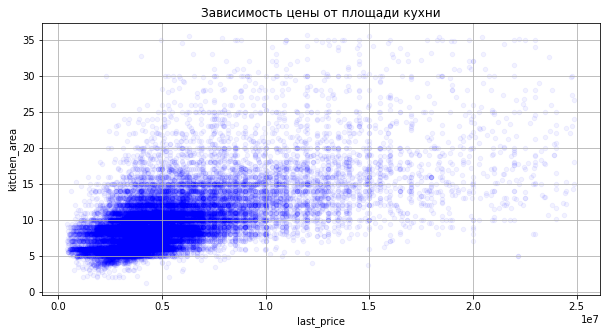

In [80]:
r = data['kitchen_area'].quantile(0.99)
p = data['last_price'].quantile(0.98)
data.query('(last_price < @p) & (kitchen_area < @r)'). \
plot(
    x='last_price', 
    y='kitchen_area', 
    kind='scatter', 
    figsize=(10, 5), 
    grid=True, 
    alpha=0.05,
    c='b',
    title='Зависимость цены от площади кухни'
);

In [81]:
data['last_price'].corr(data['kitchen_area'])

0.5141194369951924

### 3.3.4 Влияние количества комнат на цену

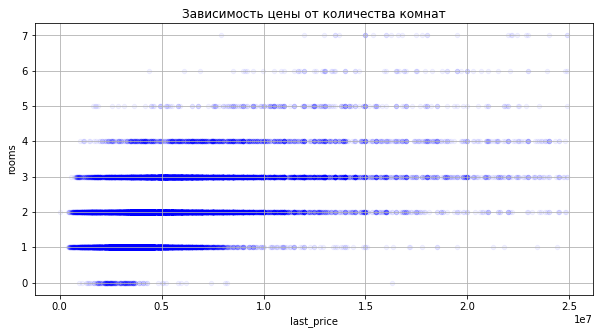

In [82]:
p = data['last_price'].quantile(0.98)
data.query('(last_price < @p) & (rooms < 8)'). \
plot(
    x='last_price', 
    y='rooms', 
    kind='scatter', 
    figsize=(10, 5), 
    grid=True, 
    alpha=0.05,
    c='b',
    title='Зависимость цены от количества комнат'
);

In [83]:
data['last_price'].corr(data['rooms'])

0.3633428499648948

In [84]:
data[data['last_price'] < p]['last_price'].corr(data['rooms'])

0.5195802541078898

* График получился немного другой, но в целом также видно, что конечно и от количества комнат цена зависит. Однокомнатных квартир дешевле 10000000 совсем мало, зато трехкомнатных достаточно много. Есть также интересная зависимость коэффициента корреляции от стоимости - если брать все данные, то зависимость слабее, чем у жилой и общей площади. А если отсечем 2% самых дорогих квартир, то получим уже существенный коэффициент.

### 3.3.5 Влияние этажа, на котором расположена квартира (первый, последний, другой)

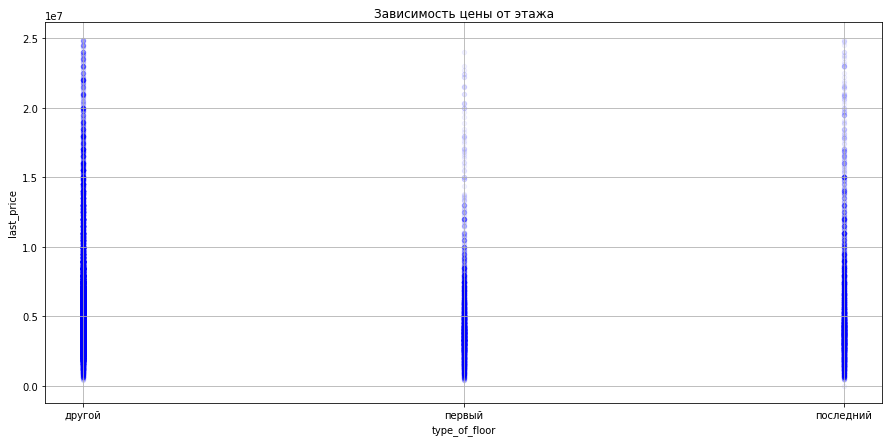

In [85]:
data.query('(last_price < @p) & (type_of_floor != "неизвестно")'). \
plot(
    x='type_of_floor', 
    y='last_price',
    kind='scatter', 
    figsize=(15, 7), 
    grid=True, 
    alpha=0.05,
    c='b',
    title='Зависимость цены от этажа'
);

In [86]:
# выведем сводную табличку, сгруппировав медиану цены по типап этажей

data.query('(last_price < @p) & (type_of_floor != "неизвестно")'). \
pivot_table(index='type_of_floor', values='last_price', aggfunc=['median', 'count'])

,median,count
,last_price,last_price
type_of_floor,,
другой,4790000.0,17001
первый,3900000.0,2893
последний,4241500.0,3230


In [87]:
# теперь посмотрим, как меняется медиана цены в зависимости от каждого этажа
# отсечем также 2% самых дорогих квартир
data_type_of_floor = data.query('last_price < @p')

data_type_of_floor = data_type_of_floor. \
pivot_table(index='floor', values='last_price', aggfunc=['median', 'count'])

data_type_of_floor.columns = ['median', 'count']
data_type_of_floor.sort_values(by='median', ascending=False)

,median,count
floor,,
30,10150000.0,1
33,9900000.0,1
32,9900000.0,1
29,9200000.0,1
28,5990000.0,1
31,5700000.0,1
22,5350000.0,113
18,5345000.0,176
13,5300000.0,374


In [88]:
# в таблице видим, что домов больше 28 этажей всего по одному, отсечем их и посмотрим еще раз
data_type_of_floor.query('floor < 28').sort_values(by='median', ascending=False)

,median,count
floor,,
22,5350000.0,113
18,5345000.0,176
13,5300000.0,374
21,5200000.0,123
16,5200000.0,312
23,5185000.0,100
24,5150000.0,62
11,5100000.0,515
12,5100000.0,519


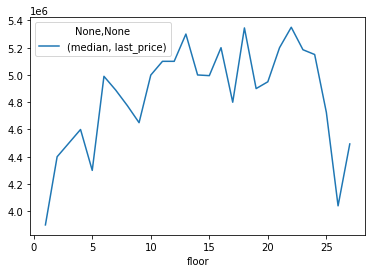

In [89]:
# посмотрим также просто линейный график
data.query('(last_price < @p) & (floor < 28)').pivot_table(index='floor', values='last_price', aggfunc=['median']).plot();

* Мы видим, что дешевле всего квартиры на первых этажах, чуть дороже последние этажи. Самые дорогие этажи - не последние и не первые, группа "другой". В этой группе самый дорогой - 22 этаж.

### 3.3.6 Влияние даты размещения (день недели, месяц, год) на цену

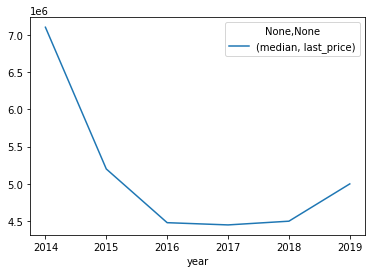

In [90]:
data.query('last_price < @p'). \
pivot_table(index='year', values='last_price', aggfunc=['median']).plot();

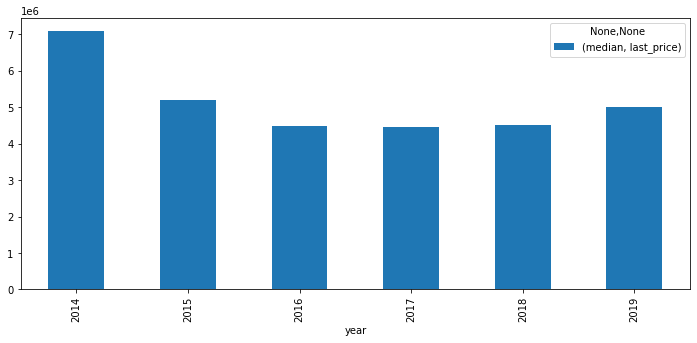

In [91]:
data.query('last_price < @p'). \
pivot_table(index='year', values='last_price', aggfunc=['median']).plot(kind='bar', figsize=(12,5));

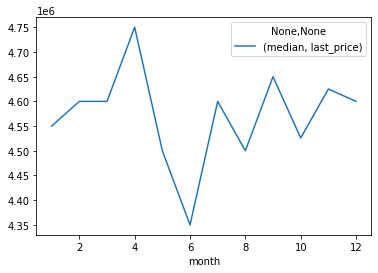

In [92]:
data.query('last_price < @p'). \
pivot_table(index='month', values='last_price', aggfunc=['median']).plot();

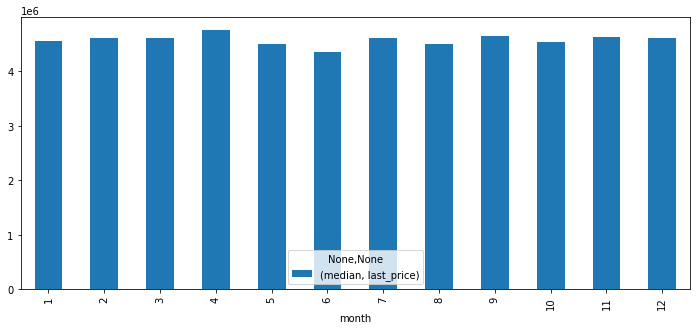

In [93]:
data.query('last_price < @p'). \
pivot_table(index='month', values='last_price', aggfunc=['median']).plot(kind='bar', figsize=(12,5));

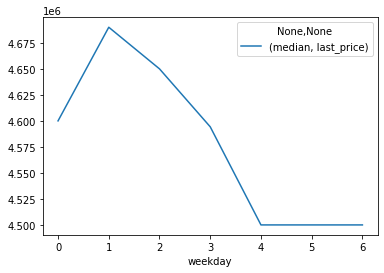

In [94]:
data.query('last_price < @p'). \
pivot_table(index='weekday', values='last_price', aggfunc=['median']).plot();

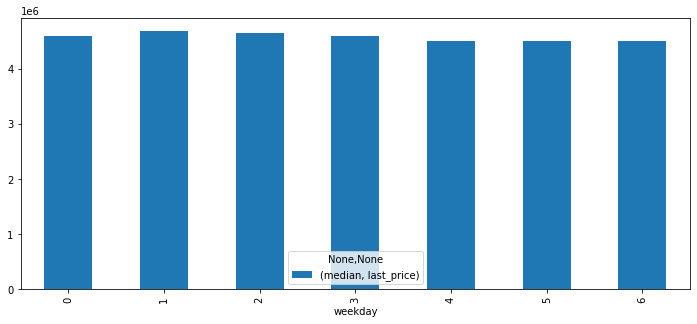

In [95]:
data.query('last_price < @p'). \
pivot_table(index='weekday', values='last_price', aggfunc=['median']).plot(kind='bar', figsize=(12,5));

* В 2014 году продавали квартиры дороже всего, потом недвижимость стала падать в цене. После 2018 цена снова стала расти.
* Дешевле всего квартиры почему-то в мае-июне.
* Дороже всего квартиры выставляют в понедельник-вторник, в выходные дешевле всего, но в целом разница не очень велика.

## 3.4 Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [96]:
data_price_per_square = data. \
pivot_table(index='locality_name', values='price_per_square', aggfunc=['mean', 'count'])

In [97]:
data_price_per_square.columns = ['mean_price', 'count']

In [98]:
data_price_per_square = data_price_per_square.sort_values(by='count', ascending=False).head(10)

In [99]:
data_price_per_square.sort_values(by='mean_price', ascending=False)

,mean_price,count
locality_name,,
Санкт-Петербург,114849.008794,15721
Пушкин,103125.819291,369
Кудрово,95324.930544,472
Парголово,90175.913458,327
Мурино,86087.512050,590
Шушары,78677.364217,440
Колпино,75424.579098,338
Гатчина,68746.146763,307
Всеволожск,68654.473986,398


* Ожидаемо, самая большая цена в Санкт-Петербурге. Выборг на 10 месте.

## 3.5 Зависимость цены от расстояния до центра Петербурга


In [100]:
data_spb = data.query('locality_name == "Санкт-Петербург"')

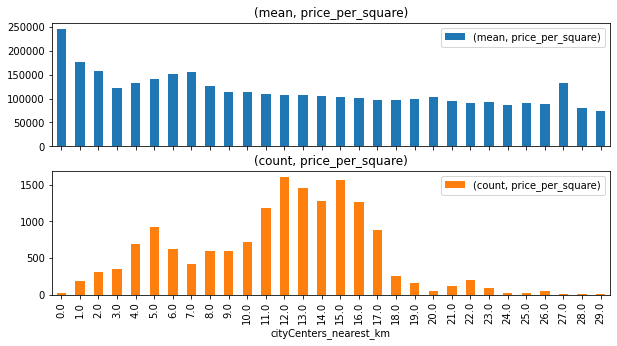

In [101]:
# построим график по свобной таблице через пивот
data_spb. \
pivot_table(index='cityCenters_nearest_km', values='price_per_square', aggfunc=['mean', 'count']).  \
plot(kind='bar', figsize=(10,5), subplots=True);

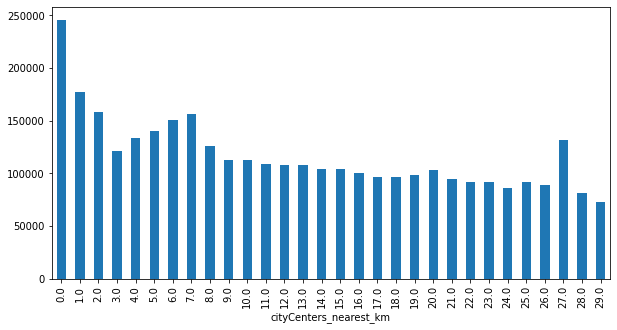

In [102]:
# а теперь такой же график по groupby
data_spb.groupby('cityCenters_nearest_km')['price_per_square'].mean().plot(kind='bar', figsize=(10,5));

* Видим, что цена падает по мере удаления от центра. Есть пики и увеличение цены на 27 и 4-7 километрах. Возможно, это может быть связано с аномальными квартирами

In [103]:
# посмотрим, что за квартиры скрываются на 27 километре
data_spb[data_spb['cityCenters_nearest_km'] == 27.0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,weekday,month,year,type_of_floor,cityCenters_nearest_km
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,False,False,25.0,0,Санкт-Петербург,23888.0,27313.0,1.0,1496.0,0.0,NaN,128.0,193918.918919,1,11,2017,другой,27.0
5961,6,2250000.0,32.0,2018-02-27,1,55555.00,2,16.5,2,False,False,False,7.0,0,Санкт-Петербург,24006.0,27431.0,0.0,NaN,0.0,NaN,178.0,70312.500000,1,2,2018,последний,27.0


* Видим, что цена падает по мере удаления от центра. Есть пики и увеличение цены на 27 и 4-7 километрах. Возможно, на 4-7 километре есть какой-то ЖК бизнес-класса с дорогой недвижимостью, стоимость которой определяется не только близостью к центру, но и многими другими параметрами. На 27 километре мы видим две квартиры, одна из которых очень дорогая, и среднее этих квартир и дает такой большой пик на графике. Вряд ли это какое-то несуществующее объявление, просто вероятно так совпало, что здесь всего две квартиры и средняя цена за квадрат получилась такой высокой.

# 4. Общий вывод

* При предобработке данных обнаружились многочисленные пропуски. Некоторые были вероятно вызваны ошибками при заполнении, как например высота потолков. Некоторые значения не были указаны, как количество балконов или апартаментов. 
* Также были обнаружены многочисленные дубликаты в столбце с названиями населенных пунктов, основная часть из них была обработана

### Основные параметры и выявленные зависимости:
 * 99% квартир имеют площадь меньше 197 кв.метров и всего 1% меньше 25 кв.метров
 * медиана общей площади равна 51.9 кв.м и среднее общей площади 52.0 кв.м
 * Средная жилая площадь равна 30 кв.метрам. 
 * Площадь кухни находится в диапазоне от 5 до 35 квадратов
 * Средняя стоимость жилья равна 4650000 руб. 98% квартир стоят меньше 25000000 руб.
 * В среднем квартиру продают за 89 дней, а медиана равна 67 дням
 
 
 * Подтверждается зависимость стоимости квартиры от общей площади, жилой площади и площади кухни. Чем больше площадь, тем выше цена. Коэффициенты корреляции для этих параметров равны 0.65, 0.57, 0.52 соответственно
 * В меньшей степени на стоимость влияет количество комнат, связь между ними более слабая
 * На стоимость влияет также этаж. Первый - самый дешевый, медианное значение - 3900000 руб. Чуть дороже последний - 4241500 руб. Из всех остальных этажей самый дорогой 22 этаж - 5350000 руб.
 * После 2014 года наблюдается резкое падение цены, потом дальнейшее плавное снижение, после 2018 стоимость квартир начинает расти
 * Интересное наблюдение - меньше всего объявлений выставляют по выходным и в мае-июне. Стоимость также падает в эти периоды.
 
 * Самая дорогая недвижимость в Санкт-Петербурге - 114849 руб/кв.метр. По мере удаления квартиры от центра стоимость падает
 
 
 * При обработке также были обнаружены некие квартиры с очень большой площадью и/или высокой стоимостью (до 700 млн руб). ТАк как такие квартиры вполне могут существовать, логично будет отделять такую недвижимость и рассматривать ее как элитную. Иначе она очень сильно перетягивает среднее многих параметров. Также вероятно, что в данные могли попасть коммерческие площади, они конечно же тоже должны рассматриваться отдельно 
